In [153]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
data = pd.read_csv('data.csv', delimiter=';')

np.random.seed(13)

data = data.sample(frac=1).reset_index(drop=True)

data = data.dropna()
data.shape

(303, 6)

In [155]:
print("Class Distribution:")
print(data['target'].value_counts(normalize=True))

counts = data['target'].value_counts()

print("Counts of zeros and ones in the target variable:")
print(counts)

Class Distribution:
target
1    0.544554
0    0.455446
Name: proportion, dtype: float64
Counts of zeros and ones in the target variable:
target
1    165
0    138
Name: count, dtype: int64


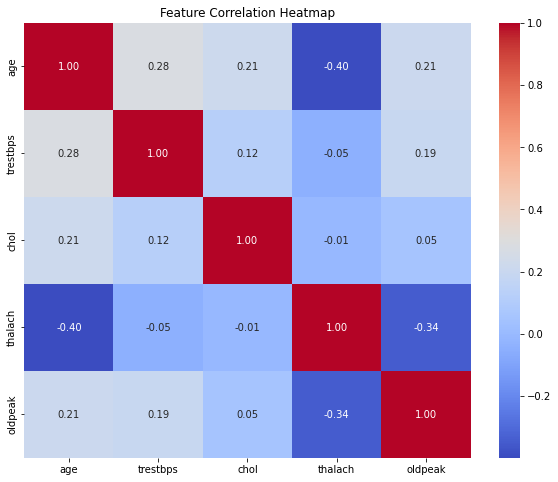

In [156]:
corr_data = data.drop('target', axis=1)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

In [157]:
X = data.drop('target', axis=1)
y = data['target']

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=13)

print("Data normalization and splitting complete.")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Data normalization and splitting complete.
Training set shape: (242, 5)
Testing set shape: (61, 5)


In [159]:
log_reg = LogisticRegression(solver='liblinear', random_state=13)

param_grid = {
    'C': np.logspace(-4, 4, 20),  
    'penalty': ['l1', 'l2']
}

In [160]:
grid_search_ = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_.fit(X_train, y_train)

best_lr_model = grid_search_.best_estimator_

print(f"Best Hyperparameters : {grid_search_.best_params_}")


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Hyperparameters : {'C': 1.623776739188721, 'penalty': 'l1'}


In [161]:
y_test_pred = best_lr_model.predict(X_test)
y_test_proba = best_lr_model.predict_proba(X_test)[:, 1]

In [162]:
test_accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_proba)

print("\n=== Test Metrics ===")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


=== Test Metrics ===
Test Accuracy: 0.7213
Precision: 0.7368
Recall: 0.8000
F1-Score: 0.7671
ROC-AUC: 0.7736

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.62      0.65        26
           1       0.74      0.80      0.77        35

    accuracy                           0.72        61
   macro avg       0.72      0.71      0.71        61
weighted avg       0.72      0.72      0.72        61



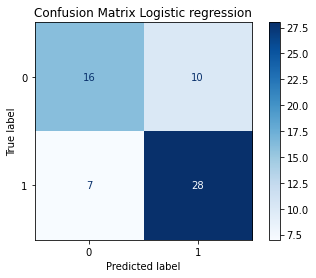

In [163]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_lr_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix Logistic regression")
plt.show()

In [164]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve, ConfusionMatrixDisplay


In [165]:

# Define parameter grid
param_grid = {
    'hidden_layer_sizes': [(32,), (64, 32), (128, 64), (64, 32, 16)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [500, 1000]
}

mlp = MLPClassifier(random_state=13)

grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross-Validated accuracy: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best Hyperparameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (128, 64), 'learning_rate_init': 0.01, 'max_iter': 500, 'solver': 'sgd'}
Best Cross-Validated ROC-AUC: 0.7357


In [166]:
best_mlp_model = grid_search

y_test_pred = best_mlp_model.predict(X_test)
y_test_proba = best_mlp_model.predict_proba(X_test)[:, 1]



In [167]:
# Evaluation Metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_proba)

print("\n=== Test Metrics Neural Network ===")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


=== Test Metrics Neural Network ===
Test Accuracy: 0.7541
Precision: 0.7500
Recall: 0.8571
F1-Score: 0.8000
ROC-AUC: 0.7670

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.62      0.68        26
           1       0.75      0.86      0.80        35

    accuracy                           0.75        61
   macro avg       0.76      0.74      0.74        61
weighted avg       0.76      0.75      0.75        61



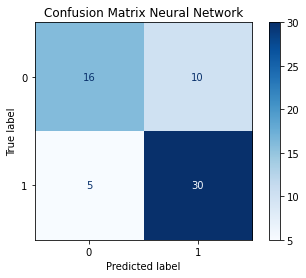

In [168]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_mlp_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix Neural Network")
plt.show()

Original number of features: 5
Reduced number of features after PCA: 4


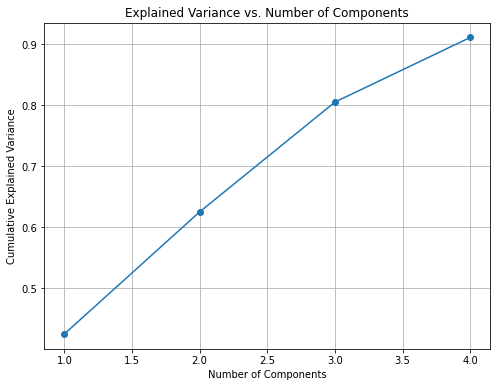

In [169]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=0.91)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Original number of features: {X_train.shape[1]}")
print(f"Reduced number of features after PCA: {X_train_pca.shape[1]}")

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
plt.show()

In [170]:

explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio for Each Component:")
for i, var in enumerate(explained_variance, 1):
    print(f"Component {i}: {var:.4f} ({np.cumsum(explained_variance)[i-1]:.4f} cumulative)")


Explained Variance Ratio for Each Component:
Component 1: 0.4247 (0.4247 cumulative)
Component 2: 0.2005 (0.6251 cumulative)
Component 3: 0.1803 (0.8054 cumulative)
Component 4: 0.1061 (0.9115 cumulative)


In [171]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid
param_grid_lr = {
    'penalty': ['l1', 'l2'],  
    'C': np.logspace(-4, 4, 20),  
    'solver': ['liblinear']  
}

grid_search_lr = GridSearchCV(estimator=LogisticRegression(random_state=13),
                            param_grid=param_grid_lr,
                            scoring='accuracy',
                            cv=5,
                            verbose=2,
                            n_jobs=-1)
grid_search_lr.fit(X_train_pca, y_train)

print(f"Best Hyperparameters for Logistic Regression(PCA): {grid_search_lr.best_params_}")
print(f"Best Cross-Validated Accuracy: {grid_search_lr.best_score_:.4f}")

Fitting 5 folds for each of 40 candidates, totalling 200 fits


Best Hyperparameters for Logistic Regression(PCA): {'C': 4.281332398719396, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validated Accuracy: 0.7438


In [172]:


grid_search_nn = GridSearchCV(estimator=MLPClassifier(random_state=13),
                            param_grid=param_grid,
                            scoring='accuracy',
                            cv=5,
                            verbose=2,
                            n_jobs=-1)
grid_search_nn.fit(X_train_pca, y_train)

print(f"Best Hyperparameters for Neural Network(PCA): {grid_search_nn.best_params_}")
print(f"Best Cross-Validated Accuracy: {grid_search_nn.best_score_:.4f}")

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best Hyperparameters for Neural Network(PCA): {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (128, 64), 'learning_rate_init': 0.001, 'max_iter': 500, 'solver': 'adam'}
Best Cross-Validated Accuracy: 0.7439


In [173]:
best_lr_model = grid_search_lr.best_estimator_
y_test_pred_lr = best_lr_model.predict(X_test_pca)
y_test_proba_lr = best_lr_model.predict_proba(X_test_pca)[:, 1]
precision = precision_score(y_test, y_test_pred_lr)
recall = recall_score(y_test, y_test_pred_lr)
f1 = f1_score(y_test, y_test_pred_lr)

print("\n=== Logistic Regression Test Metrics ===")
print(f"Testing Accuracy: {accuracy_score(y_test, y_test_pred_lr):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_proba_lr):.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print(classification_report(y_test, y_test_pred_lr))


=== Logistic Regression Test Metrics ===
Testing Accuracy: 0.7213
ROC-AUC: 0.7769
Precision: 0.7368
Recall: 0.8000
F1-Score: 0.7671
              precision    recall  f1-score   support

           0       0.70      0.62      0.65        26
           1       0.74      0.80      0.77        35

    accuracy                           0.72        61
   macro avg       0.72      0.71      0.71        61
weighted avg       0.72      0.72      0.72        61



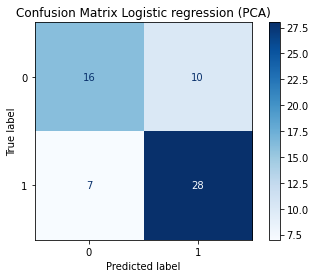

In [174]:
conf_matrix = confusion_matrix(y_test, y_test_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grid_search_lr.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix Logistic regression (PCA)")
plt.show()

In [175]:
best_nn_model = grid_search_nn.best_estimator_
y_test_pred_nn = best_nn_model.predict(X_test_pca)
y_test_proba_nn = best_nn_model.predict_proba(X_test_pca)[:, 1]
precision = precision_score(y_test, y_test_pred_nn)
recall = recall_score(y_test, y_test_pred_nn)
f1 = f1_score(y_test, y_test_pred_nn)

print("\n=== Neural Network Test Metrics ===")
print(f"Testing Accuracy: {accuracy_score(y_test, y_test_pred_nn):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_proba_nn):.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(classification_report(y_test, y_test_pred_nn))


=== Neural Network Test Metrics ===
Testing Accuracy: 0.6721
ROC-AUC: 0.7725
Precision: 0.7143
Recall: 0.7143
F1-Score: 0.7143
              precision    recall  f1-score   support

           0       0.62      0.62      0.62        26
           1       0.71      0.71      0.71        35

    accuracy                           0.67        61
   macro avg       0.66      0.66      0.66        61
weighted avg       0.67      0.67      0.67        61



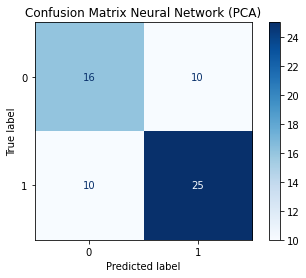

In [176]:
conf_matrix = confusion_matrix(y_test, y_test_pred_nn)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=grid_search_nn.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix Neural Network (PCA)")
plt.show()

C:\Users\Adam\AppData\Local\Temp\ipykernel_13448\986854642.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Test Accuracy", y="Model", data=results_df, palette="viridis")


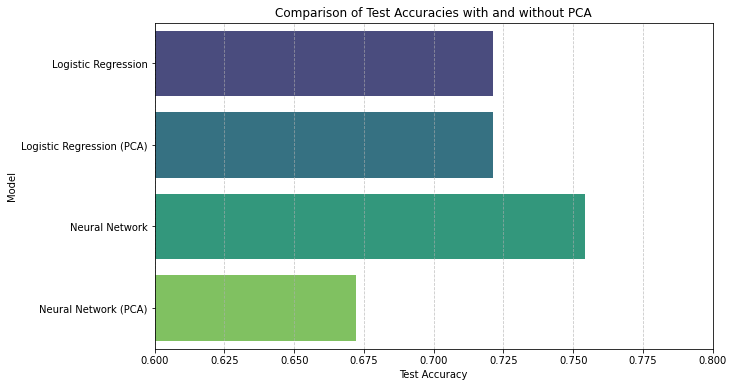

In [177]:
results_data = {
    "Model": ["Logistic Regression", "Logistic Regression (PCA)", "Neural Network", "Neural Network (PCA)"],
    "Test Accuracy": [0.7213, 0.7213, 0.7541, 0.6721] 
}
results_df = pd.DataFrame(results_data)

plt.figure(figsize=(10, 6))
sns.barplot(x="Test Accuracy", y="Model", data=results_df, palette="viridis")
plt.title("Comparison of Test Accuracies with and without PCA")
plt.xlabel("Test Accuracy")
plt.ylabel("Model")
plt.xlim(0.6, 0.8)  
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()